# Gene set enrichment analysis using a custom background gene set from the entire human proteome to proteins detected by chemoproteomics

In [1]:
# Author: Lisa Boatner
# Date Created: 221128
# Date Modified: 221206
# Updates: Removed NaN from Gene List

# Import Modules

### Documentation for GSEAPY module: https://gseapy.readthedocs.io/en/latest/introduction.html

In [2]:
pip install gseapy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os, sys
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
from matplotlib.colors import ListedColormap
import gseapy as gp
from gseapy import barplot, dotplot

## Define Functions

In [4]:
def get_enrichment(gene_id_list, enrichr_lib, background_custom, background_list):
    if background_custom == True:
        enr = gp.enrichr(gene_list = gene_id_list,
                 gene_sets=[enrichr_lib],
                 background = background_list,
                 organism='human', 
                 outdir=None, 
                )
    else:
        enr = gp.enrichr(gene_list = gene_id_list,
                 gene_sets=[enrichr_lib],
                 organism='human', 
                 outdir=None, 
                )
    
    return enr

In [5]:
def plot_enrichment_bar(dataset_name, lib_name, enrich_results, cutoff, nterms, save):
    # specify color palette for plot
    cmap = plt.cm.ocean_r
    colors = cmap(np.linspace(0, 0.2, 10))

    ax = barplot(enrich_results.res2d, 
                 title = lib_name, 
                 figsize=(10, 8),
                 color = colors,
                 thresh=cutoff,
                 n_terms=int(nterms),
                 # cmap="viridis"
                )

    if save == True:
        plt.savefig(dataset_name + '_' + lib_name + '_barplot_enrichment_proteome_results.png', dpi = 300, bbox_inches = 'tight')

In [6]:
def plot_enrichment_dot(dataset_name, lib_name, enrich_results, cutoff, nterms, save):
    # specify color palette for plot
    cmap = plt.cm.ocean_r
    colors = cmap(np.linspace(0, 0.2, 10))
    
    ax = dotplot(enrich_results.res2d, 
                 title = lib_name, 
                 figsize=(10, 8),
                 color = colors,
                 thresh=cutoff,
                 n_terms=int(nterms),
                 # cmap="viridis"
                )

    plt.savefig(dataset_name + '_' + lib_name + '_dotplot_enrichment_proteome_results.png', dpi = 300, bbox_inches = 'tight')

# 

# Read Input File

### note: jupyter.idre.ucla.edu users need to upload their results folder or specific file you want to analyze by using the up arrow symbol on the top navigation bar

In [7]:
# assuming current directory is main folder
cd = os.getcwd()
cd

'/home/jovyan/backus_lab'

In [8]:
# move to results directory
# skip this step if you only uploaded the specific csv and not the entire results folder
# os.chdir('results')

In [9]:
# read csv file, specify enrichment at the protein level or cysteine level
# specify the name of the csv file you want to analyze
# ex. filename: 'compiled_proteins.csv'
df = pd.read_csv('compiled_proteins.csv')

In [10]:
# check that the program read the file
df.head()

,protein,description,gene,identifiers,peptides,peptide_count,spectral_count,modifications,modification_count,amino_acids,...,Experiment-1_avg_of_medians,Experiment-2_avg_of_medians,Experiment-1_stdev_of_medians,Experiment-2_stdev_of_medians,total_quant_list,Experiment-1_Exp1_Replicate-2_median,Experiment-1_Exp1_Replicate-1_median,Experiment-2_Exp2-Replicate-1_median,Experiment-2_Exp2-Replicate-2_median,Unnamed: 31
0,Q86X55,Histone-arginine methyltransferase CARM1,CARM1,Q86X55_C26,AAAAAAVGPGAGGAGSAVPGGAGPC*ATVSVFPGAR,1,3,25_C[527.3213];25_C[521.3074],2,C,...,1.291182,1.295200,NaN,NaN,1.2911815216979126;1.295200001608753,1.291182,NaN,1.295200,NaN,NaN
1,Q99615,DnaJ homolog subfamily C member 7,DNAJC7,Q99615_C7,AAAAEC*DVVMAATEPELLDDQEAKR,1,3,6_C[521.3074];6_C[527.3213],2,C,...,1.347838,4.039893,NaN,NaN,1.3478380214036192;4.039893401046718,1.347838,NaN,4.039893,NaN,NaN
2,Q5SRE5,Nucleoporin NUP188 homolog,NUP188,Q5SRE5_C9;Q5SRE5_C1270,AAAAGGPC*VR;HSLALGSATEDKDSMETDDC*SR,2,4,8_C[527.3213];8_C[521.3074];20_C[527.3213];20_...,4,C,...,1.020498,0.846141,NaN,NaN,1.0204981401893118;0.8102536010867071;0.882029...,1.020498,NaN,0.846141,NaN,NaN
3,Q8IYU8,Calcium uptake protein 2; mitochondrial,MICU2,Q8IYU8_C8,AAAAGSC*AR,1,2,7_C[527.3213];7_C[521.3074],2,C,...,1.050002,NaN,NaN,NaN,1.0500022223666556,1.050002,NaN,NaN,NaN,NaN
4,Q9NRL3,Striatin-4,STRN4,Q9NRL3_C17,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,1,2,12_C[527.3213];12_C[521.3074],2,C,...,1.432112,NaN,NaN,NaN,1.432112392544983,1.432112,NaN,NaN,NaN,NaN


# 

# Preprocess Specific Dataset for Analysis

### optional: subset your dataset based on misc criteria

In [11]:
# # subset dataset based on criteria
# df = df[df[['your_column_name'] == 'specific_value']]

# 

### note: specify control group as all genes detected by chemoproteomics
### note: do not specify control group if using entire proteome as background

In [12]:
# assumes your input file has a column called 'gene'
# replace this string to whatever the column name is in your file that lists the associated gene names
gene_col_name = 'gene'
df = df[df[gene_col_name].notna()]
gene_background_id_list = list(df[gene_col_name].unique())
len(gene_background_id_list)

1709

In [13]:
# check background list is not empty
gene_background_id_list[:10]

['CARM1',
 'DNAJC7',
 'NUP188',
 'MICU2',
 'STRN4',
 'NSRP1',
 'CAST',
 'LIG3',
 'DENR',
 'RFC1']

# 

### specify experimental group

In [14]:
# specify experimental group as all genes with 
# log2ratio >= X or log2ratio <= X
# ex. column name for selecting cutoff: 'aggregate_avg_of_avg_of_medians'
# ex. log2ratio cuttoff: 2
quant_col_name = 'aggregate_avg_of_avg_of_medians'
cutoff = 0
gene_experiment_id_df = df[df[quant_col_name] >= cutoff]
gene_experiment_id_list = list(gene_experiment_id_df[gene_col_name].unique())
gene_experiment_id_list = [x for x in gene_experiment_id_list if x != None]
len(gene_experiment_id_list)

1588

In [15]:
# check experiment list is not empty
gene_experiment_id_list[:10]

['CARM1',
 'DNAJC7',
 'NUP188',
 'MICU2',
 'STRN4',
 'NSRP1',
 'CAST',
 'LIG3',
 'DENR',
 'RFC1']

# 

# Set Enrichment Library

In [16]:
# display all librarys available for enrichment
library_names = gp.get_library_name()
library_names

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisG

In [17]:
# specify library
lib_name = 'KEGG_2021_Human'

# 

# Option 1: Set Human Proteome as Background Gene Set

In [18]:
# specify dataset name for output files
dataset_name = '230922_test_proteome'

In [19]:
# specify if you want the results to be saved
save = False

In [20]:
# specify if using a custom background gene list
background_custom = False

In [21]:
# run enrichment test
proteome_enrich_results = get_enrichment(gene_experiment_id_list, 
                                lib_name, 
                                background_custom, 
                                gene_background_id_list)

In [22]:
# export results to csv
if save == True:
    proteome_enrich_results.results.to_csv(dataset_name  + '_' + lib_name + '_enrichment_proteome_results.csv', index = False)

In [23]:
# check results are not empty
proteome_enrich_results.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Ribosome,58/158,1.924235e-24,5.714979e-22,0,0,6.941804,3.790747e+02,RPL4;RPL30;RPL3;MRPS16;RPL32;RPL34;MRPS11;RPLP...
1,KEGG_2021_Human,RNA transport,57/186,1.152010e-19,1.710734e-17,0,0,5.276639,2.301016e+02,EIF4A2;CYFIP1;EIF4A1;NUP188;POP1;GEMIN2;RPP30;...
2,KEGG_2021_Human,Salmonella infection,66/249,7.966934e-19,7.887265e-17,0,0,4.319575,1.800132e+02,CYFIP1;HSP90AB1;ARPC1B;CSE1L;FHOD1;PIK3C2A;ACT...
3,KEGG_2021_Human,Spliceosome,49/150,2.186465e-18,1.623450e-16,0,0,5.772290,2.347258e+02,TCERG1;RBM25;DDX46;DDX42;HNRNPU;PRPF19;PQBP1;E...
4,KEGG_2021_Human,Coronavirus disease,60/232,1.097969e-16,6.521935e-15,0,0,4.164130,1.530230e+02,RPL4;RPL30;RPL3;RPL32;RPL34;RPLP1;RPLP0;ADAR;R...
...,...,...,...,...,...,...,...,...,...,...
292,KEGG_2021_Human,Cell adhesion molecules,3/148,9.995555e-01,9.999951e-01,0,0,0.238447,1.060064e-04,PTPRC;ITGB2;ICAM1
293,KEGG_2021_Human,Hematopoietic cell lineage,1/99,9.997255e-01,9.999951e-01,0,0,0.117755,3.233413e-05,DNTT
294,KEGG_2021_Human,Herpes simplex virus 1 infection,21/498,9.997297e-01,9.999951e-01,0,0,0.503887,1.362316e-04,PDIA3;DAXX;SP100;STAT1;TAP2;TRAF2;PTPN11;TSC1;...
295,KEGG_2021_Human,Protein digestion and absorption,1/103,9.998023e-01,9.999951e-01,0,0,0.113113,2.236941e-05,ATP1A1


# 

## Plot Enrichment Results from Background Proteome Set

In [24]:
# check if results have significantly enriched terms based on adjusted p-val cutoff of 0.05
num_proteome_enrich_results = proteome_enrich_results.res2d[proteome_enrich_results.res2d['Adjusted P-value'] <= 0.05].shape[0]
if (num_proteome_enrich_results)  == 0:
    print('There are NO enriched terms based on the cutoff of 0.05')
else:
    print('There are enriched terms based on the cutoff of 0.05')

There are enriched terms based on the cutoff of 0.05


In [25]:
# specify customized plot options
cutoff = 0.05
top_nterms = 10

/opt/conda/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


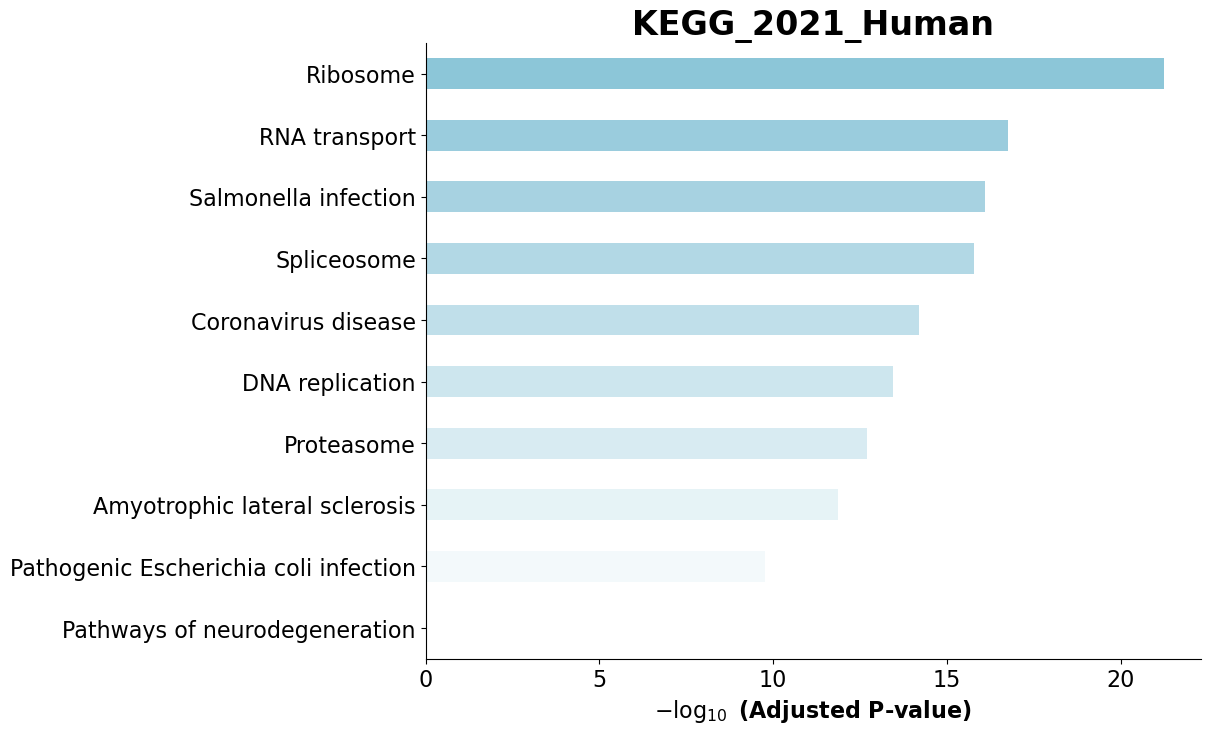

In [26]:
# plot and save figure
plot_enrichment_bar(dataset_name, lib_name, proteome_enrich_results, cutoff, top_nterms, save)

/opt/conda/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


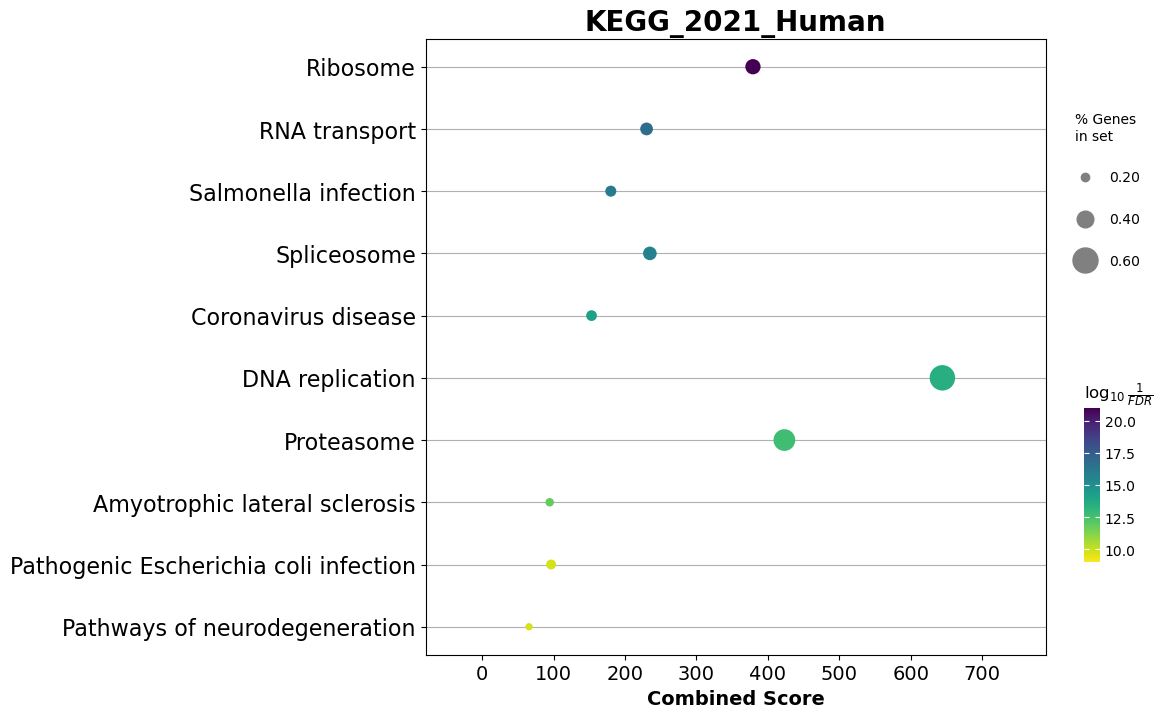

In [27]:
# plot and save figure
plot_enrichment_dot(dataset_name, lib_name, proteome_enrich_results, cutoff, top_nterms, save)

# 

# Option 2: Set Custom Background Gene Set

In [28]:
# specify dataset name for output files
dataset_name = '230922_test_custom'

In [29]:
# specify if you want the results to be saved
save = False

In [30]:
# specify if using a custom background gene list
background_custom = True

In [31]:
# run enrichment test
custom_enrich_results = get_enrichment(gene_experiment_id_list, 
                                lib_name, 
                                background_custom, 
                                gene_background_id_list)

In [32]:
# export results to csv
if save == True:
    custom_enrich_results.results.to_csv(dataset_name  + '_' + lib_name + '_enrichment_custom_results.csv', index = False)

In [33]:
custom_enrich_results.results

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Ribosome,0.068823,0.999689,0,0,4.549020,12.174136,RPL4;RPL30;RPL3;MRPS16;RPL32;RPL34;MRPS11;RPLP...
1,KEGG_2021_Human,Proteasome,0.169514,0.999689,0,0,inf,inf,PSMD12;PSMD14;PSMD13;PSMA7;PSMB10;PSMB8;PSMB7;...
2,KEGG_2021_Human,Insulin signaling pathway,0.196731,0.999689,0,0,inf,inf,GSK3B;PYGB;MAP2K1;PRKCI;MAP2K2;PRKAA2;RPS6;ARA...
3,KEGG_2021_Human,Endocytosis,0.199547,0.999689,0,0,3.100775,4.997538,WASHC4;ARPC1B;VPS4B;CLTC;AGAP1;NEDD4L;CDC42;GR...
4,KEGG_2021_Human,Ribosome biogenesis in eukaryotes,0.211922,0.999689,0,0,inf,inf,NOP56;WDR36;NOP58;POP1;RPP30;EFL1;CSNK2A2;SNU1...
...,...,...,...,...,...,...,...,...,...
292,KEGG_2021_Human,Proximal tubule bicarbonate reclamation,0.996882,0.999689,0,0,0.112618,0.000352,GLUD1;ATP1A1;PCK2
293,KEGG_2021_Human,Arginine biosynthesis,0.998684,0.999689,0,0,0.075032,0.000099,GLUD1;ASS1
294,KEGG_2021_Human,Ether lipid metabolism,0.998684,0.999689,0,0,0.075032,0.000099,AGPS;PAFAH1B3
295,KEGG_2021_Human,Mineral absorption,0.998684,0.999689,0,0,0.075032,0.000099,ATP2B4;ATP1A1


# 

## Plot Enrichment Results from Custom Background Set

In [34]:
# check if results have significantly enriched terms based on adjusted p-val cutoff of 0.05
num_custom_enrich_results = custom_enrich_results.res2d[custom_enrich_results.res2d['Adjusted P-value'] <= 0.05].shape[0]
if (num_custom_enrich_results)  == 0:
    print('There are NO enriched terms based on the cutoff of 0.05')
else:
    print('There are enriched terms based on the cutoff of 0.05')

There are NO enriched terms based on the cutoff of 0.05


In [35]:
# specify customized plot options
cutoff = 0.05
top_nterms = 10

In [36]:
try: 
    plot_enrichment_bar(dataset_name, lib_name, custom_enrich_results, cutoff, top_nterms, save)
except:
    print("Could not plot custom enrichment results via gseapy package. Manually plot as a bar graph for visualizing < " + str(cutoff) +  " values.")

Could not plot custom enrichment results via gseapy package. Manually plot as a bar graph for visualizing < 0.05 values.
